In [73]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
#import category_encoders as ce
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import model_selection #сплитование выборки
from sklearn import preprocessing #предобработка данных
%matplotlib inline

In [74]:
test = pd.read_csv('Data/test.csv')
train = pd.read_csv('Data/train.csv')
display(test.head(), train.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
train['Sex'] = train['Sex'].apply(lambda x: 1 if x =='male' else 0)
test['Sex'] = test['Sex'].apply(lambda x: 1 if x =='male' else 0)
le = preprocessing.LabelEncoder()
train["Embarked"]=le.fit_transform(train["Embarked"])
test["Embarked"]=le.fit_transform(test["Embarked"])
P_Id = test['PassengerId']
train.drop(columns=['Name','Ticket','Cabin','PassengerId'],inplace=True)
test.drop(columns=['Name','Ticket','Cabin','PassengerId'],inplace=True)
display(train.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


<Axes: >

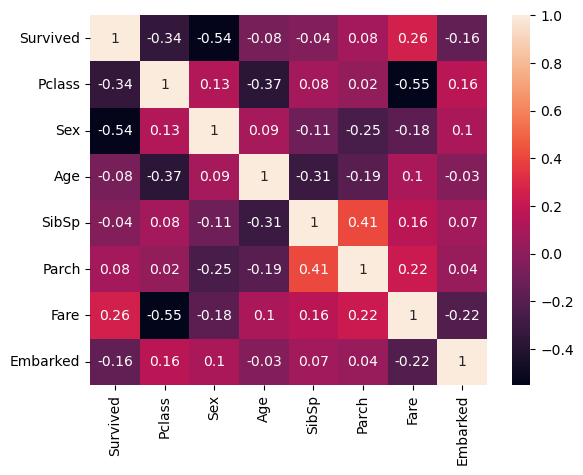

In [76]:
sns.heatmap(round(train.corr(),2),annot=True)

In [77]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [78]:
test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [79]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

In [80]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [81]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>, <Axes: >]], dtype=object)

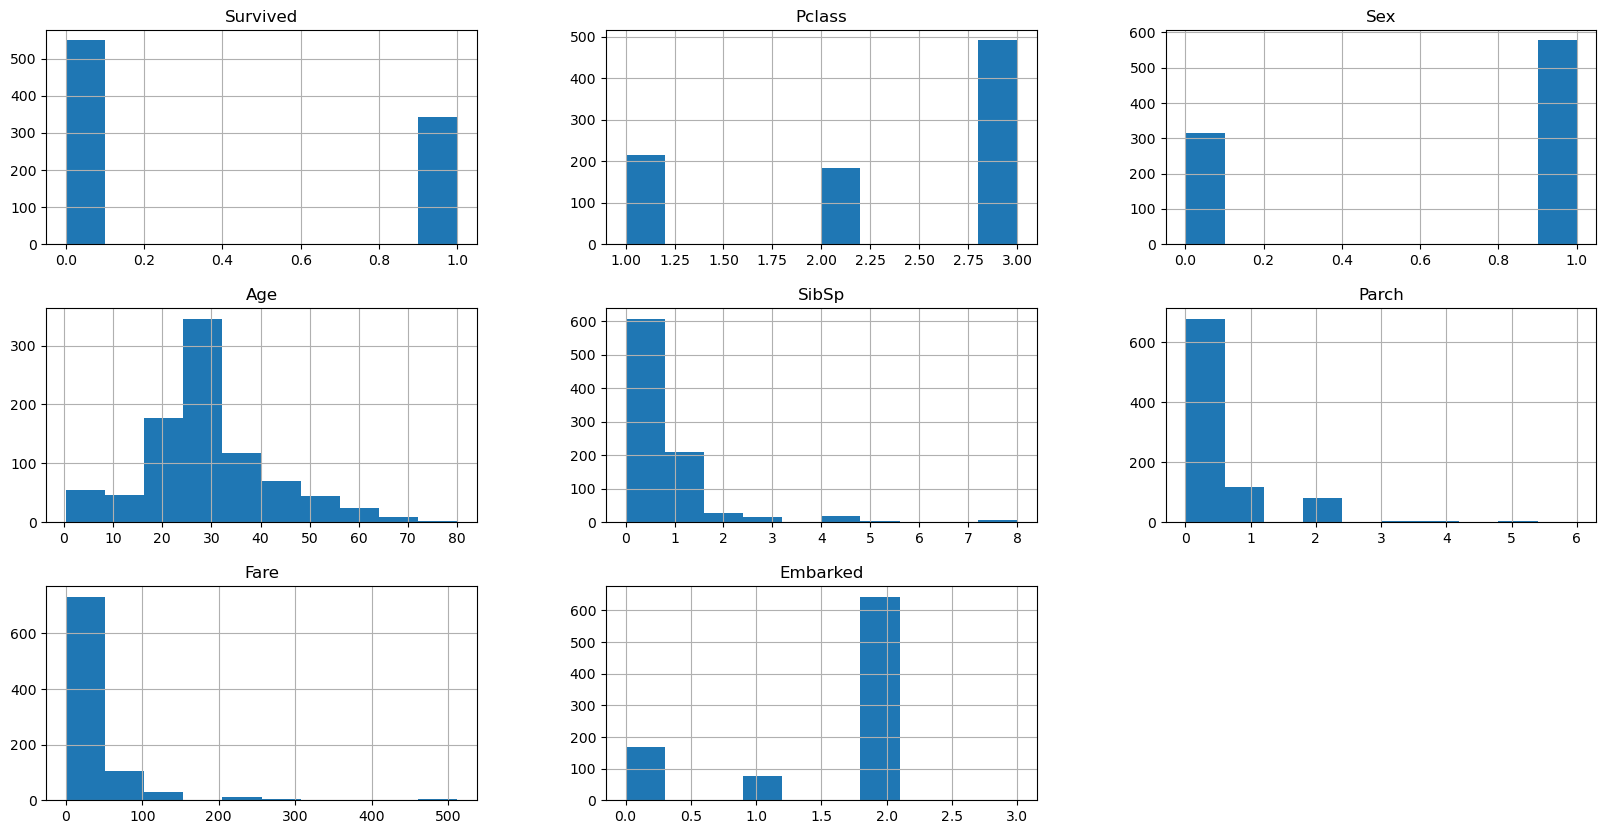

In [82]:
train.hist(figsize=(20,10))

In [83]:
train['Age'] = np.log(train['Age']+1)
X_train = train.drop(columns='Survived')
y_train = train['Survived']
test['Age'] = np.log(test['Age']+1)
X_test = test


In [84]:
scaler_standard = preprocessing.MinMaxScaler()
scaler_standard.fit(X_train)
X_train_scaled = scaler_standard.transform(X_train)
X_test_scaled = scaler_standard.transform(X_test)

In [85]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(
    #solver='sag',  #алгоритм оптимизации
    random_state=42,  #генератор случайных чисел
    #penalty='l2'
)
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [86]:
y_train_pred = log_reg.predict(X_train_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))
#Делаем предсказание для тестовой выборки
#y_test_pred = log_reg.predict(X_test_scaled)
# #Вывод отчет о метриках классификации
#print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.77      0.71      0.74       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.80       891
weighted avg       0.81      0.81      0.81       891



Нужно как можно больше precision, чтобы уменьшить количество ложных попаданий тех, кто выживет

In [87]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train_scaled)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test_scaled)
#Выводим результирующие размерности таблиц
print(X_train_poly.shape)
print(X_test_poly.shape)

(891, 35)
(418, 35)


C:\Users\Denis\anaconda3\envs\pythonProject11\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\Denis\anaconda3\envs\pythonProject11\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [88]:
log_reg = linear_model.LogisticRegression(
    solver='sag', #алгоритм оптимизации
    random_state=42, #генератор случайных чисел
    penalty='l2'
)
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_poly, y_train)

LogisticRegression(random_state=42, solver='sag')

In [89]:
#Делаем предсказание для тренировочной выборки
y_train_pred = log_reg.predict(X_train_poly)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       549
           1       0.82      0.69      0.75       342

    accuracy                           0.82       891
   macro avg       0.82      0.80      0.81       891
weighted avg       0.82      0.82      0.82       891



In [90]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    criterion='entropy',
    min_samples_leaf=10,
    random_state=42
)
#Обучаем модель
rf.fit(X_train_poly, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       random_state=42)

In [91]:
y_train_pred = rf.predict(X_train_poly)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       549
           1       0.88      0.70      0.78       342

    accuracy                           0.85       891
   macro avg       0.86      0.82      0.83       891
weighted avg       0.85      0.85      0.84       891



In [92]:
rf.predict(X_test_poly)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [93]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_poly, y_train)
y_train_pred = svc.predict(X_train_poly)
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       549
           1       0.85      0.67      0.75       342

    accuracy                           0.83       891
   macro avg       0.84      0.80      0.81       891
weighted avg       0.83      0.83      0.82       891



In [94]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_scaled, y_train)
y_train_pred = svc.predict(X_train_scaled)
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       549
           1       0.85      0.67      0.75       342

    accuracy                           0.83       891
   macro avg       0.83      0.80      0.81       891
weighted avg       0.83      0.83      0.82       891



In [95]:
f1 = pd.DataFrame({
    "PassengerId":P_Id,
    "Survived":rf.predict(X_test_poly)
})
f1.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [96]:
f1.set_index("PassengerId", inplace=True)
f1.to_csv("Data/submission.csv")